In [ ]:
#pip install tensorflow keras pandas matplotlib opencv-python scikit-learn


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload kaggle.json

Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"vishrutiparekh","key":"9fc3aa809c94895cbbe82ce4af06c1bd"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c cassava-leaf-disease-classification

100% 5.76G/5.76G [03:22<00:00, 33.0MB/s]
100% 5.76G/5.76G [03:22<00:00, 30.6MB/s]


In [ ]:
#!unzip cassava-leaf-disease-classification.zip -d /content/cassava_data


In [ ]:
df = pd.read_csv('/content/cassava_data/train.csv')


In [ ]:
print(df.head())
print(df['label'].value_counts())


         image_id  label
0  1000015157.jpg      0
1  1000201771.jpg      3
2   100042118.jpg      1
3  1000723321.jpg      1
4  1000812911.jpg      3
label
3    13158
4     2577
2     2386
1     2189
0     1087
Name: count, dtype: int64


**Load Images and Labels:**

In [ ]:
import os

# List contents of the directory
print(os.listdir('/content/cassava_data/train_images'))


['4169071977.jpg', '2279241820.jpg', '3703204136.jpg', '3869536239.jpg', '3419613818.jpg', '3658535011.jpg', '3090899728.jpg', '2224409184.jpg', '677178045.jpg', '2169305287.jpg', '3772719243.jpg', '3977938536.jpg', '2549375363.jpg', '2613035787.jpg', '4257897572.jpg', '2064710008.jpg', '1530647390.jpg', '1969528266.jpg', '3888912096.jpg', '2263381455.jpg', '1364472347.jpg', '3516709559.jpg', '3277846362.jpg', '542786109.jpg', '2080389783.jpg', '417059979.jpg', '3791679940.jpg', '633946965.jpg', '2777420116.jpg', '2698895843.jpg', '1978440967.jpg', '3714369192.jpg', '2617937740.jpg', '2807560080.jpg', '2152051451.jpg', '240629774.jpg', '923499439.jpg', '3589892630.jpg', '3391958379.jpg', '3474085074.jpg', '2268128907.jpg', '747749936.jpg', '217699633.jpg', '3086931192.jpg', '3412184648.jpg', '3323262594.jpg', '2451596981.jpg', '1365660763.jpg', '214682484.jpg', '1645330578.jpg', '3923316959.jpg', '878287964.jpg', '393700734.jpg', '3013391375.jpg', '165797964.jpg', '3398785705.jpg', '25

In [ ]:
import os
import shutil
import pandas as pd

# Define the base directory where images are located
base_dir = '/content/cassava_data/train_images'
csv_file_path = '/content/cassava_data/train.csv'  # Path to your CSV file

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Print the DataFrame to check its structure
print("DataFrame structure:")
print(df.head())  # Display the first few rows
print("\nDataFrame types:")
print(df.dtypes)  # Display the data types of each column

# Ensure labels are strings
df['label'] = df['label'].astype(str)

# List of class names (optional, for verification)
CLASSES = df['label'].unique().tolist()

# Print the class names for verification
print("\nClass Names:")
print(CLASSES)

# Create class directories if they don't exist
for class_name in CLASSES:
    # Ensure class_name is a string
    if isinstance(class_name, str):
        os.makedirs(os.path.join(base_dir, class_name), exist_ok=True)
    else:
        print(f"Skipping non-string class name: {class_name}")

# Move images to their respective class directories
for _, row in df.iterrows():
    image_name = row['image_id']
    class_name = row['label']

    source_path = os.path.join(base_dir, image_name)  # Path to the original image
    dest_path = os.path.join(base_dir, class_name, image_name)  # Path to the new location

    if os.path.exists(source_path):  # Check if the source image exists
        shutil.move(source_path, dest_path)  # Move the image
    else:
        print(f"Image not found: {source_path}")  # Log if the image is missing


DataFrame structure:
         image_id  label
0  1000015157.jpg      0
1  1000201771.jpg      3
2   100042118.jpg      1
3  1000723321.jpg      1
4  1000812911.jpg      3

DataFrame types:
image_id    object
label        int64
dtype: object

Class Names:
['0', '3', '1', '2', '4']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training and validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    '/content/cassava_data/train_images',
    target_size=(224, 224),   # Resize images
    batch_size=32,
    class_mode='categorical',  # Use categorical for multi-class classification
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/content/cassava_data/train_images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',   # Use categorical for validation as well
    subset='validation'
)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the base model using VGG16
base_model = keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Create the model
model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # Assuming 5 classes for cassava diseases
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Found 17120 images belonging to 5 classes.
Found 4277 images belonging to 5 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the base model
base_model = keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Create the model
model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # Assuming 5 classes for cassava diseases
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10  # Adjust the number of epochs as needed
)


Epoch 1/10
115/535 ━━━━━━━━━━━━━━━━━━━━ 3:52 554ms/step - accuracy: 0.7423 - loss: 0.7088

KeyboardInterrupt: 

In [ ]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")


134/134 ━━━━━━━━━━━━━━━━━━━━ 66s 494ms/step - accuracy: 0.7191 - loss: 0.7612
Validation Accuracy: 71.26%


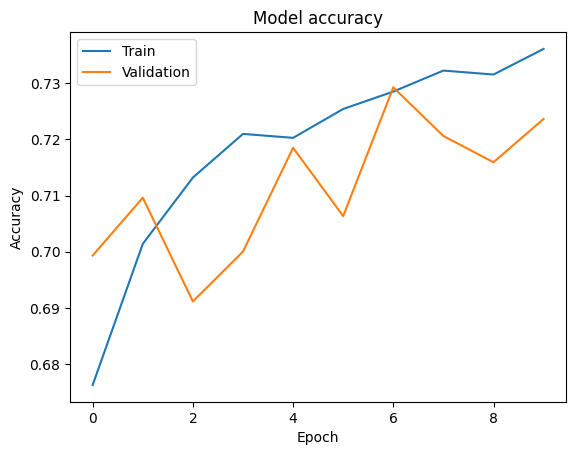

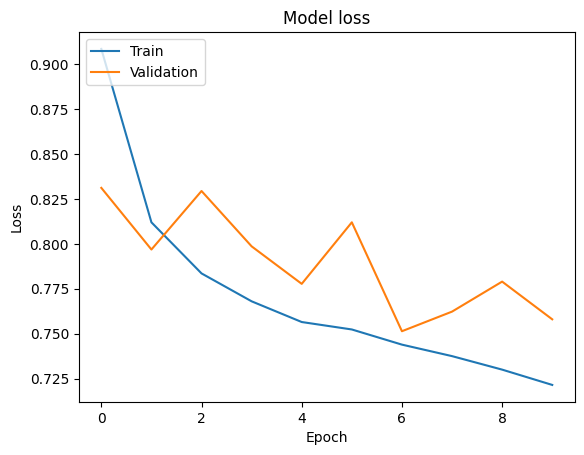

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


134/134 ━━━━━━━━━━━━━━━━━━━━ 69s 482ms/step


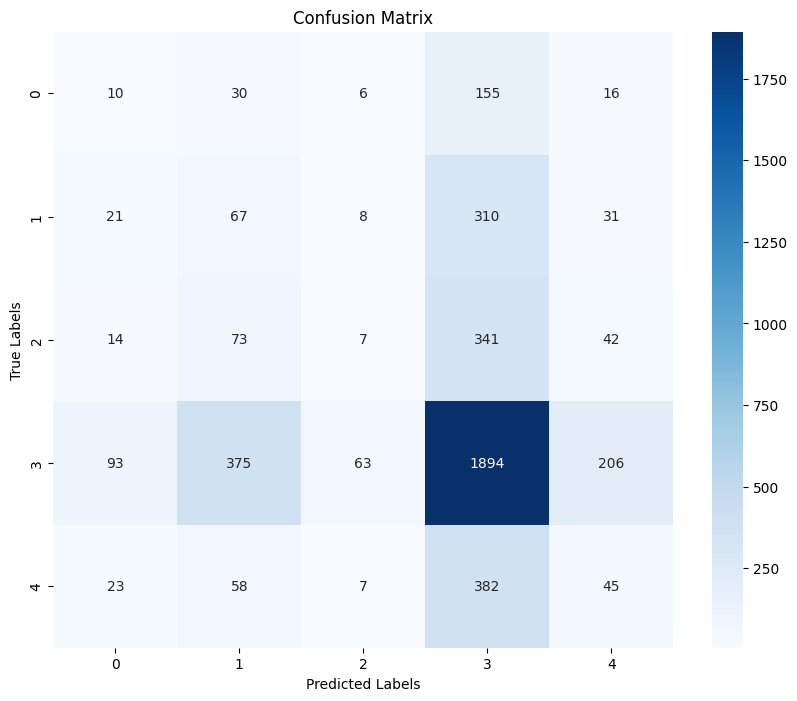

In [ ]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming validation_generator is your validation data generator
# Get true labels and predictions
y_true = validation_generator.classes
y_pred = model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)

# Get class names from the generator
class_names = list(validation_generator.class_indices.keys())

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import os
print(os.listdir('/content/cassava_data/train_images'))


['2', '1', '4', '3', '0']


In [ ]:
import os

# Example: List images within the '0' class folder
class_folder = '/content/cassava_data/train_images/0'
image_files = os.listdir(class_folder)
print(image_files)  # List all image files in the '0' folder


['2308841380.jpg', '2982305511.jpg', '3385309388.jpg', '678707458.jpg', '1775350103.jpg', '3253305739.jpg', '1540668864.jpg', '4207597254.jpg', '3762414961.jpg', '833082515.jpg', '3331601570.jpg', '3115344482.jpg', '1258444443.jpg', '775831061.jpg', '2435784137.jpg', '3361317754.jpg', '4091663475.jpg', '375377758.jpg', '1312770396.jpg', '2276860012.jpg', '3514831407.jpg', '1584698721.jpg', '808416790.jpg', '2354424014.jpg', '3134495079.jpg', '3340101218.jpg', '1021758544.jpg', '3963604072.jpg', '3327250048.jpg', '1963346508.jpg', '2813938477.jpg', '988174802.jpg', '3882757126.jpg', '4044444164.jpg', '1072326766.jpg', '4165541319.jpg', '3489692619.jpg', '442164564.jpg', '478757157.jpg', '2005545104.jpg', '3246642151.jpg', '4010033110.jpg', '1947066099.jpg', '2038601042.jpg', '3340211522.jpg', '3974644689.jpg', '492140725.jpg', '353746186.jpg', '1148829591.jpg', '3924372198.jpg', '1652157522.jpg', '1207142999.jpg', '1629534694.jpg', '2478144118.jpg', '4056643222.jpg', '2499859350.jpg', '

In [ ]:

# Define the path to the test images folder
test_folder = '/content/cassava_data/test_images'
image_files = os.listdir(test_folder)
print(image_files)  # List all image files in the test_images folder


['2216849948.jpg']


In [ ]:
from tensorflow.keras.preprocessing import image

img_path = '/content/cassava_data/test_images/2216849948.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
print(f'Predicted class: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted class: [3]


In [ ]:
model.save('model.keras')  # Saves in the Keras format


In [ ]:
from google.colab import files
files.download('model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>